<a href="https://colab.research.google.com/github/devp712/ML-Data/blob/main/DP_Classification_Models(GroupProject).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries/reading in data

In [1]:
'''!pip install pydot
!pip install pydot-ng
!pip install graphviz
!pip install --upgrade scikit-learn==0.20.3'''

'!pip install pydot\n!pip install pydot-ng\n!pip install graphviz\n!pip install --upgrade scikit-learn==0.20.3'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/loan_data.csv')

#EDA

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
# checking how many credit.policy items are there
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [5]:
# checking column names
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
# trying to determine which variables indicate that a loan was rejected
# with a credit policy score of 0 we can observe a lower fico score
df[df['credit.policy']==0].head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7710,0,debt_consolidation,0.1608,35.20,10.308953,23.84,642,2490.000000,10125,90.4,1,0,0,0
7711,0,debt_consolidation,0.1608,246.38,12.152144,22.47,647,7212.000000,150971,92.3,4,0,0,1
7712,0,debt_consolidation,0.1600,787.53,11.264464,19.34,682,3780.041667,15897,66.0,5,0,1,0
7713,0,educational,0.1640,126.40,10.308953,29.60,677,1643.000000,3043,58.5,1,0,0,1
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.000000,26531,52.6,33,0,0,1


In [8]:
# checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
# we can observe that there are no null values
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

#KNN 

##standarize feature values

In [45]:
# assigning StandardScaler() to a variable so we can standardize features
scalar=StandardScaler()

In [46]:
# creating a dataframe to drop purpose column
df2=df.drop(columns='purpose',inplace=False) 

In [47]:
#standardizing all the feature columns except for the target column, this being 'credit policy'
scalar.fit(df2.drop('credit.policy', axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
#stores all of the scaled values for the features of our data set, not including the target column
scaled_features=scalar.transform(df2.drop('credit.policy',axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [50]:
# splitting the data into x and y subsets with a test size of 20%
X_train, X_test, y_train, y_test=train_test_split(scaled_features, df2['credit.policy'], test_size=0.3)  #test_size=30%

In [51]:
score=[]

In [52]:
#to measure the accuracy score associated with each k value, stored in a list
for i in range(1,40): 
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred))        

TypeError: ignored

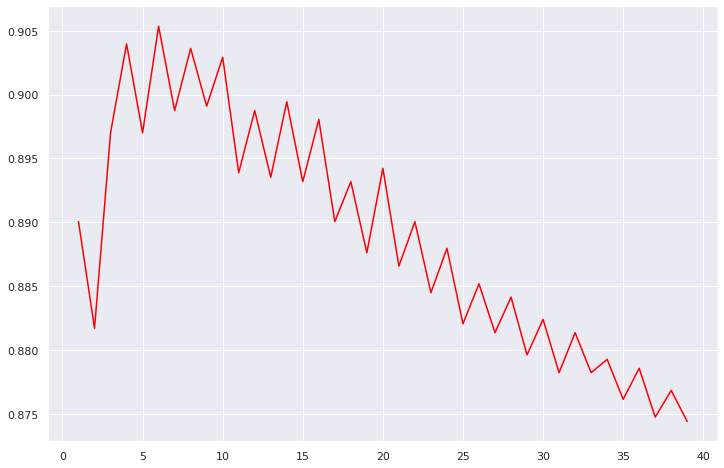

In [53]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40), score, color='red')
plt.xlabel('Value of K for KNN') 
plt.ylabel('Testing Accuracy')
# we can see that the optimal k value is 6

In [54]:
error_rate=[]

In [55]:
# trying to determine error rate for k values from 1 to 40 
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

TypeError: ignored

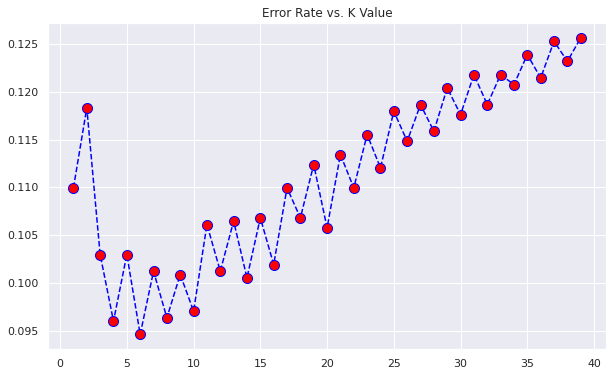

In [56]:
#display error rate against k value
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Value of K for KNN')  
plt.ylabel('Error Rate')
# error rate graph confirms that 6 is optimal k value

In [57]:
#building the KNN classifier model
# setting k value to 6
knn=KNeighborsClassifier(n_neighbors=6)

In [58]:
#training the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [59]:
#stores the predicted y_test values (y_test_predict)
predict=knn.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.38      0.55       576
           1       0.86      1.00      0.93      2298

   micro avg       0.87      0.87      0.87      2874
   macro avg       0.93      0.69      0.74      2874
weighted avg       0.89      0.87      0.85      2874

[[ 217  359]
 [   2 2296]]


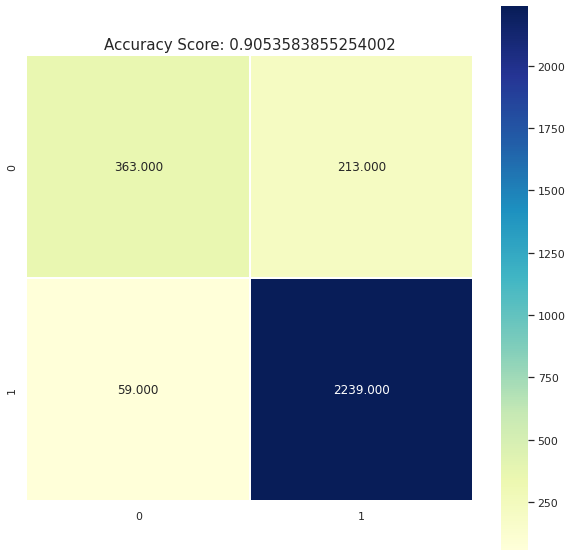

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu')
plt.ylabel=('Actual label')
plt.xlabel=('Predicted label')
all_sample_title = f'Accuracy Score: {knn.score(X_test,y_test)}'
plt.title(all_sample_title, size = 15);
#displays accuracy score for 90%

#Decision Tree Classification model

In [28]:
df2.head(1)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0


In [29]:
#can use df2(does not have 'purpose')

X=df2.iloc[:,1:] #all non target columns

y=df2.iloc[:,0] #target col

In [30]:
# splitting data into x and y subsets with test size of 30%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [31]:
dtree = DecisionTreeClassifier() #bring in model
dtree.fit(X_train,y_train) #train model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
#accuracy score of 99%

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       574
           1       0.99      1.00      0.99      2300

   micro avg       0.99      0.99      0.99      2874
   macro avg       0.99      0.98      0.99      2874
weighted avg       0.99      0.99      0.99      2874



In [33]:
print(confusion_matrix(y_test,predictions))

[[ 559   15]
 [   9 2291]]


In [34]:
features = list(df2.columns[1:]) #isolates feature names

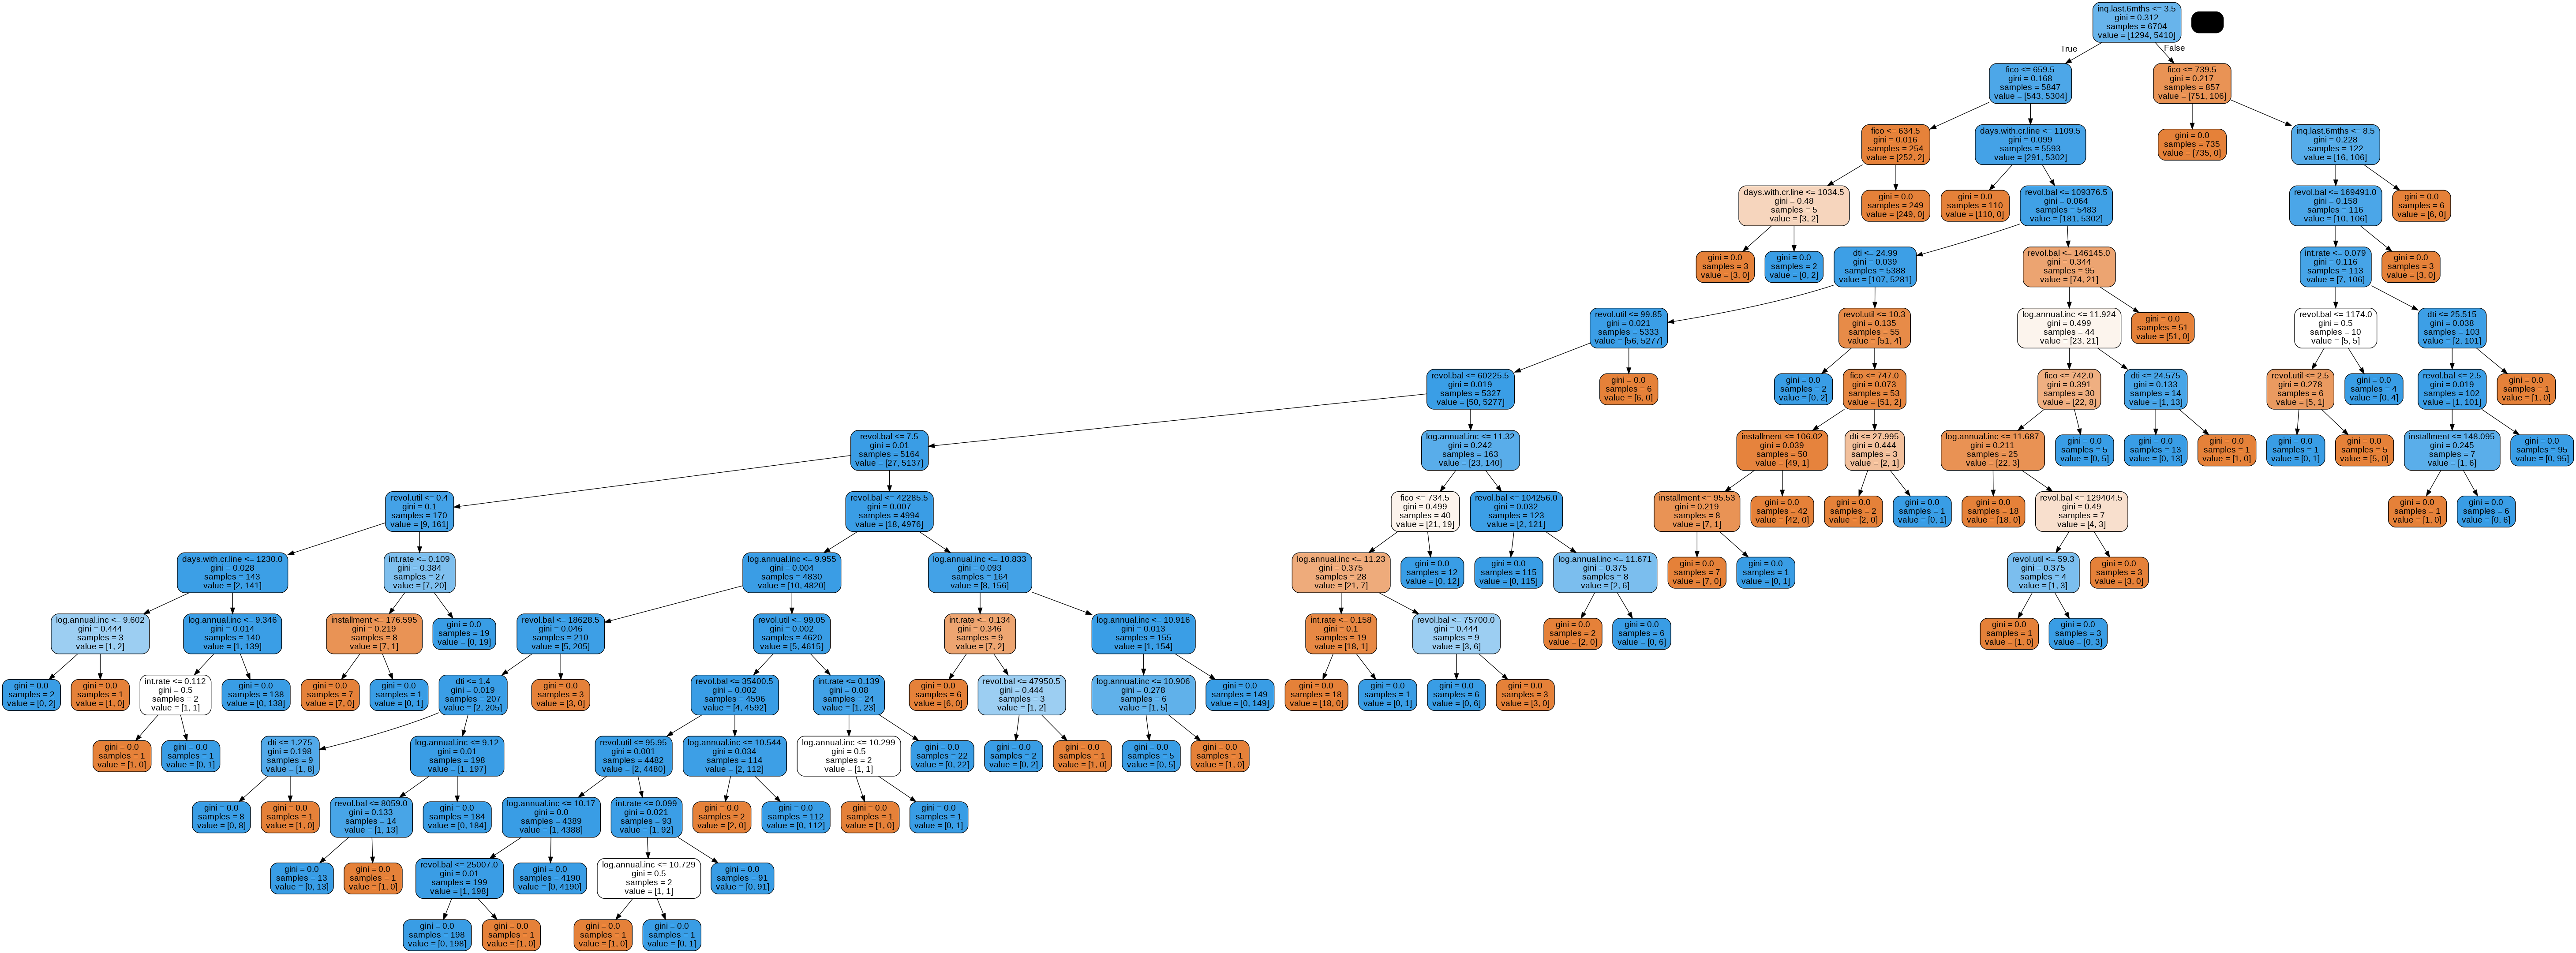

In [35]:
# displaying decision tree
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

#Random Tree Forest model

In [36]:
rfc = RandomForestClassifier(n_estimators=100) #build model with number of estimators(#of trees in forest)
rfc.fit(X_train, y_train) #train model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
rfc_pred= rfc.predict(X_test)

In [38]:
print(confusion_matrix(y_test, rfc_pred))

[[ 543   31]
 [   6 2294]]


In [39]:
print(classification_report(y_test, rfc_pred))
#accuracy score overall of 99%

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       574
           1       0.99      1.00      0.99      2300

   micro avg       0.99      0.99      0.99      2874
   macro avg       0.99      0.97      0.98      2874
weighted avg       0.99      0.99      0.99      2874

